In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# 一.重命名轴索引

In [2]:
df = DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'C': ['C0', 'C1', 'C2', 'C3']
})
df.rename(columns={'A':'a', 'B':'b', 'C':'c'}, inplace=True) # 重命名列索引名称, 并对原数据修改
df

,a,b,c
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3


In [3]:
df.rename(str.lower, axis='columns') # 使用lower函数, 将大写字母改成小写字母

,a,b,c
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3


In [4]:
df.rename(index={1:'a', 2:'b'}, inplace=True) # 重命名行索引名称, 并对原数据修改
df

,a,b,c
0,A0,B0,C0
a,A1,B1,C1
b,A2,B2,C2
3,A3,B3,C3


# 二.重叠合并练习

In [5]:
d1 = DataFrame({
    'A': [2, 3, 5, 2, 3],
    'B': [5, np.nan, 2, 3, 6],
    'C': [8, 7, 50, 8, 2],
    'key': [3, 4, 5, 2, 5]
})
d1

,A,B,C,key
0,2,5.0,8,3
1,3,NaN,7,4
2,5,2.0,50,5
3,2,3.0,8,2
4,3,6.0,2,5


In [6]:
d2 = DataFrame({
    'A': [3, 3, 3],
    'B': [4, 4, 4],
    'C': [5, 5, 5]
})
d2

,A,B,C
0,3,4,5
1,3,4,5
2,3,4,5


In [7]:
result = d1.combine_first(d2)
result

,A,B,C,key
0,2,5.0,8,3
1,3,4.0,7,4
2,5,2.0,50,5
3,2,3.0,8,2
4,3,6.0,2,5


In [8]:
result.rename(columns={'key': 'D'})

,A,B,C,D
0,2,5.0,8,3
1,3,4.0,7,4
2,5,2.0,50,5
3,2,3.0,8,2
4,3,6.0,2,5


In [9]:
result.replace(to_replace=50, value=10)

,A,B,C,key
0,2,5.0,8,3
1,3,4.0,7,4
2,5,2.0,10,5
3,2,3.0,8,2
4,3,6.0,2,5


# 三.泰坦尼克号生还者数据清洗

## 1.读取数据

In [10]:
titanoc_data = pd.read_csv(r'./data/titanic.csv')
titanoc_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 2.检查缺失值

In [11]:
titanoc_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 3.用年龄平均值填充缺失值

In [12]:
age_mean = round(titanoc_data['age'].mean()) # 求平均值, 保留0位小数
age_mean

30

In [13]:
titanoc_data.fillna({'age':age_mean}, inplace=True) # 用年龄平均值填充缺失值
titanoc_data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 4.用众数填充embarked和embark_town

In [14]:
embarked_mode = titanoc_data['embarked'].mode()
embarked_mode

0    S
Name: embarked, dtype: object

In [15]:
embark_town_mode = titanoc_data['embark_town'].mode()
embark_town_mode

0    Southampton
Name: embark_town, dtype: object

In [16]:
titanoc_data.fillna({'embarked':embarked_mode[0], 'embark_town':embark_town_mode[0]}, inplace=True) # 用众数填充缺失值
titanoc_data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

## 5.删除deck特征列

In [17]:
titanoc_data.dropna(axis=1, inplace=True) # 按照特征缺失值删除
titanoc_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


## 6.删除多余的字段(重复的列)

In [18]:
titanoc_data = titanoc_data.drop(['survived', 'pclass', 'sibsp', 'parch', 'who', 'adult_male', 'embark_town'], axis=1)

## 7.检查重复值并删除

In [19]:
titanoc_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [20]:
titanoc_data[titanoc_data.duplicated().values == True]

,sex,age,fare,embarked,class,alive,alone
47,female,30.0,7.7500,Q,Third,yes,True
76,male,30.0,7.8958,S,Third,no,True
77,male,30.0,8.0500,S,Third,no,True
87,male,30.0,8.0500,S,Third,no,True
95,male,30.0,8.0500,S,Third,no,True
...,...,...,...,...,...,...,...
870,male,26.0,7.8958,S,Third,no,True
877,male,19.0,7.8958,S,Third,no,True
878,male,30.0,7.8958,S,Third,no,True
884,male,25.0,7.0500,S,Third,no,True


In [21]:
titanoc_data = titanoc_data.drop_duplicates() # 删除重复数据
titanoc_data

,sex,age,fare,embarked,class,alive,alone
0,male,22.0,7.2500,S,Third,no,False
1,female,38.0,71.2833,C,First,yes,False
2,female,26.0,7.9250,S,Third,yes,True
3,female,35.0,53.1000,S,First,yes,False
4,male,35.0,8.0500,S,Third,no,True
...,...,...,...,...,...,...,...
885,female,39.0,29.1250,Q,Third,no,False
887,female,19.0,30.0000,S,First,yes,True
888,female,30.0,23.4500,S,Third,no,False
889,male,26.0,30.0000,C,First,yes,True


## 8.用箱型图检查age和fare是否存在异常

<AxesSubplot:>

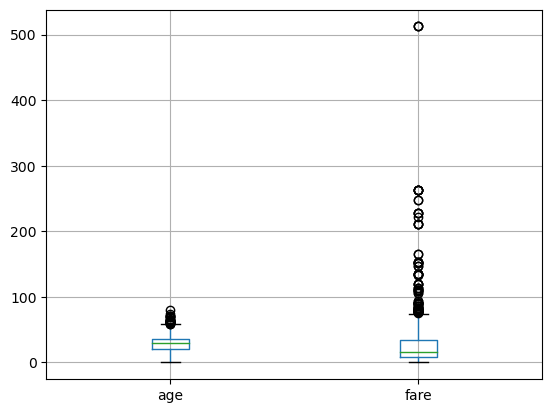

In [22]:
titanoc_data.boxplot(column=['age', 'fare'])